In [ ]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
def SeparateColumns(dataSetName):
    columns = defaultdict(list)
    with open(dataSetName, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        headers = next(reader)
        column_nums = range(len(headers)) # Do NOT change to xrange
        for row in reader:
            for i in column_nums:

                columns[headers[i]].append(row[i])
    # Following line is only necessary if you want a key error for invalid column names
    return dict(columns)

In [ ]:
columns = SeparateColumns('/content/Dyt-desktop1.csv')
desktopData=pd.DataFrame.from_dict(columns)

desktopData

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1,0,...,0,0,0,17,2,0,2,0.117647,0,No
1,Female,Yes,Yes,13,12,12,0,12,1,0,...,4,0.114286,0,26,2,2,2,0.0769231,0.0769231,Yes
2,Female,No,Yes,7,6,6,0,6,1,0,...,4,0.114286,0,26,1,3,1,0.0384615,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,No
4,Female,No,Yes,8,4,4,0,4,1,0,...,1,25,0.05,26,2,2,2,0.0769231,0.0769231,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,Male,No,No,10,7,7,0,7,1,0,...,2,0.67,0.33,4,1,3,1,0.25,0.75,Yes
3640,Female,No,Yes,15,9,9,0,9,1,0,...,3,0.75,0.25,4,2,2,2,0.5,0.5,No
3641,Female,No,Yes,15,11,11,0,11,1,0,...,3,0.6,0.4,4,2,2,2,0.5,0.5,No
3642,Female,No,Yes,15,10,10,0,10,1,0,...,3,0.75,0.25,4,3,1,3,0.75,0.25,No


In [ ]:
columns = SeparateColumns('/content/Dyt-tablet1.csv')
tabletData=pd.DataFrame.from_dict(columns)
tabletData.replace(["NULL"], np.nan, inplace = True)

tabletData

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,Yes,No,7,6,6,0,6,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,Female,Yes,No,7,7,7,0,7,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,Female,Yes,No,7,6,6,0,6,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Male,Yes,No,7,5,5,0,5,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,Male,Yes,No,7,8,6,2,8,0.75,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Male,Yes,No,17,13,13,0,13,1,0,...,35,0.11428571428571,0,26,4,0,26,0.15384615384615,0,No
1391,Female,Yes,Yes,17,9,9,0,9,1,0,...,35,0.11428571428571,0,26,4,0,26,0.15384615384615,0,No
1392,Male,Yes,Yes,17,10,10,0,10,1,0,...,35,0.11428571428571,0,27,3,2,27,0.11111111111111,0.074074074074074,No
1393,Female,Yes,Yes,17,11,11,0,11,1,0,...,35,0.11428571428571,0,26,4,0,26,0.15384615384615,0,No


In [ ]:
desktopData.shape

(3644, 197)

In [ ]:
tabletData.shape

(1395, 197)

In [ ]:
desktopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 197 entries, Gender to Dyslexia
dtypes: object(197)
memory usage: 5.5+ MB


In [ ]:
desktopData.columns

Index(['Gender', 'Nativelang', 'Otherlang', 'Age', 'Clicks1', 'Hits1',
       'Misses1', 'Score1', 'Accuracy1', 'Missrate1',
       ...
       'Score31', 'Accuracy31', 'Missrate31', 'Clicks32', 'Hits32', 'Misses32',
       'Score32', 'Accuracy32', 'Missrate32', 'Dyslexia'],
      dtype='object', length=197)

In [ ]:
desktopData['Gender'].unique()

array(['Male', 'Female'], dtype=object)

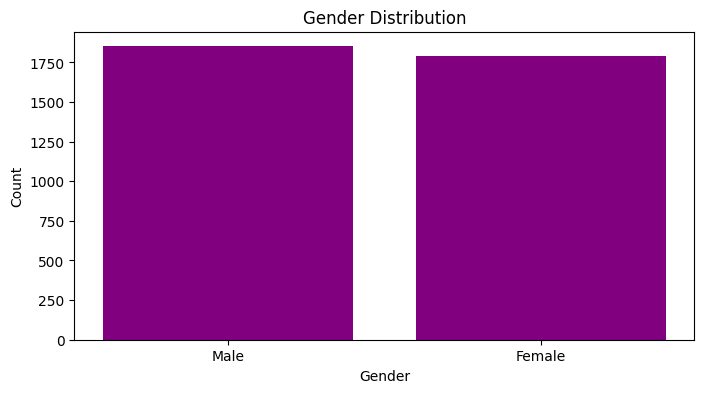

In [ ]:
# Gender distribution
# Sample data for demonstration
gender_counts = desktopData['Gender'].value_counts()
gender_labels = ['Male', 'Female']  # Custom labels for 1 and 0

# Create a numerical index for the custom labels
x = range(len(gender_labels))

plt.figure(figsize=(8, 4))
plt.bar(x, gender_counts.values, color=["purple"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Set custom labels for the x-axis
plt.xticks(x, gender_labels)

plt.show()

<Figure size 800x400 with 0 Axes>

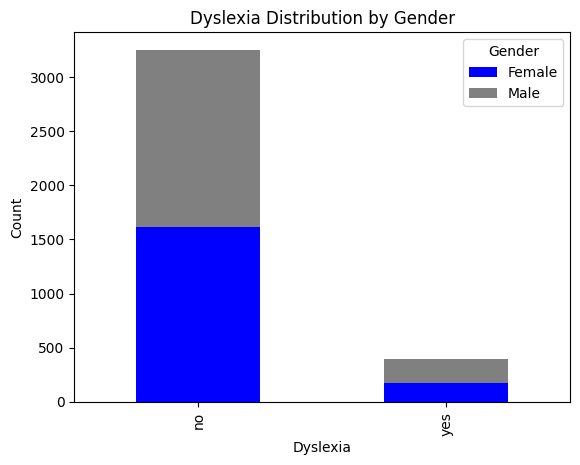

In [ ]:
# Stacked Bar Chart for Dyslexia Distribution by Gender
# Sample data for demonstration
dyslexia_gender_counts = desktopData.groupby(['Dyslexia', 'Gender']).size().unstack()
gender_labels = ['no', 'yes']  # Custom labels for 1 and 0

plt.figure(figsize=(8, 4))
ax = dyslexia_gender_counts.plot(kind='bar', stacked=True, color=["blue", "gray"])
plt.xlabel('Dyslexia')
plt.ylabel('Count')
plt.title('Dyslexia Distribution by Gender')

# Set custom labels for the x-axis
plt.xticks(range(len(gender_labels)), gender_labels)

plt.show()

In [ ]:
desktopData['Nativelang'].unique()

array(['No', 'Yes'], dtype=object)

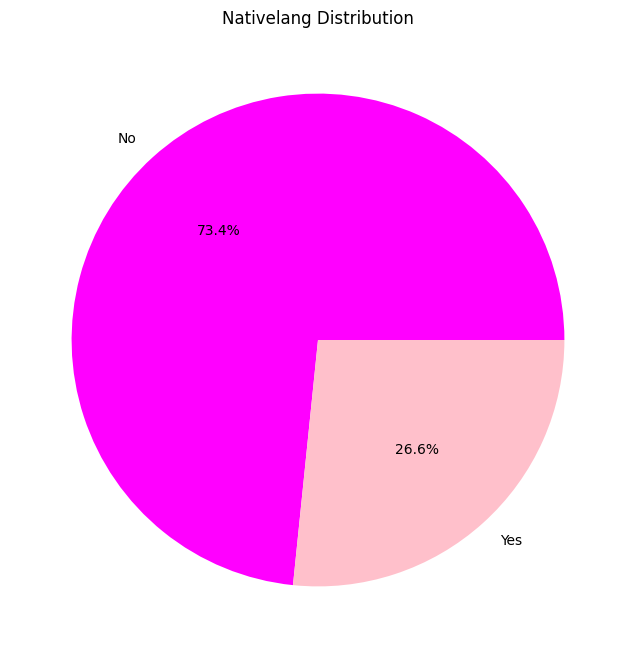

In [ ]:
# Pie Chart for Nativelang Distribution
nativelang_counts = desktopData['Nativelang'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nativelang_counts, labels=nativelang_counts.index, autopct='%1.1f%%', colors=["magenta","pink"])
plt.title('Nativelang Distribution')
plt.show()

In [ ]:
desktopData['Otherlang'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
desktopData['Age'].unique()

array(['7', '13', '8', '9', '16', '17', '11', '14', '10', '12', '15'],
      dtype=object)

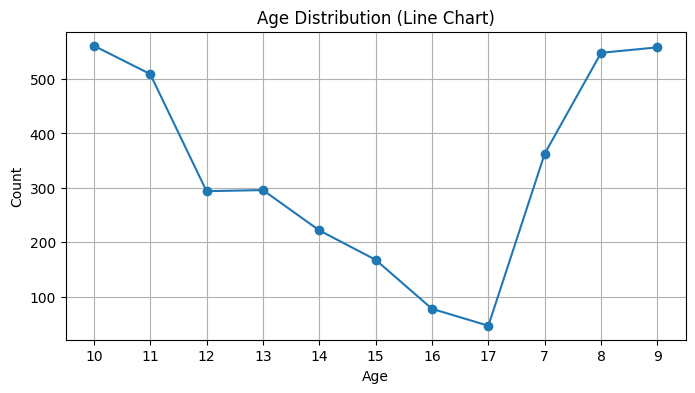

In [ ]:
# Age distribution
age_values = desktopData['Age']
age_counts = age_values.value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution (Line Chart)')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [ ]:
desktopData.isnull().sum()

Gender        0
Nativelang    0
Otherlang     0
Age           0
Clicks1       0
             ..
Misses32      0
Score32       0
Accuracy32    0
Missrate32    0
Dyslexia      0
Length: 197, dtype: int64

In [ ]:
def clean_data(data):
    # Map categorical variables to numeric values
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['Dyslexia'] = data['Dyslexia'].map({'No': 0, 'Yes': 1})
    data['Nativelang'] = data['Nativelang'].map({'No': 0, 'Yes': 1})
    data['Otherlang'] = data['Otherlang'].map({'No': 0, 'Yes': 1})

    # Fill missing values with column mean
    data.fillna(data.mean(), inplace=True)

    return data

# Clean both desktop and tablet datasets
cleaned_desktopData = clean_data(desktopData)
cleaned_tabletData = clean_data(tabletData)

<ipython-input-114-f1b8d5a65728>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
<ipython-input-114-f1b8d5a65728>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
def clean_and_preprocess(data):
    cols_to_remove = ['Clicks29', 'Hits29', 'Misses29', 'Score29', 'Accuracy29', 'Missrate29']
    data.drop(cols_to_remove, axis=1, inplace=True)

    # Select common columns suitable for all age ranges
    common_columns = ['Gender', 'Nativelang', 'Otherlang', 'Age', 'Dyslexia']
    for i in range(30):
      if (i < 12 or (13 <= i < 17) or i == 21 or i == 22 or i == 29):
        common_columns += [f'Clicks{i+1}', f'Hits{i+1}', f'Misses{i+1}', f'Score{i+1}', f'Accuracy{i+1}', f'Missrate{i+1}']

    data = data[common_columns]
    return data

desktopData = clean_and_preprocess(desktopData)
tabletData = clean_and_preprocess(tabletData)

<ipython-input-116-4345eef572b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = desktopData.corr()


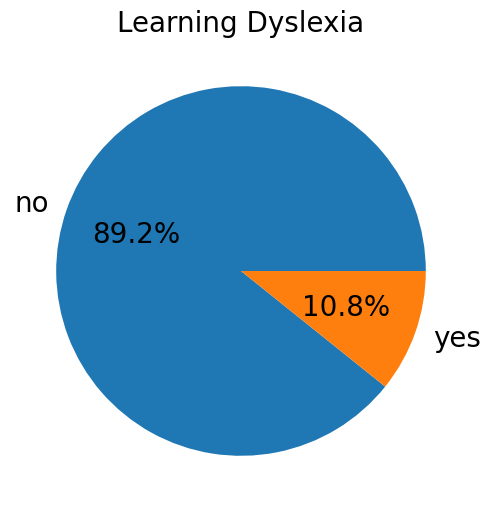

In [ ]:
import matplotlib.pyplot as plt
corr = desktopData.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
df_test = desktopData.copy()
df_test = desktopData.astype('string')

plt.figure(figsize = (8,6))
plt.pie(df_test['Dyslexia'].value_counts(), labels = ['no', 'yes'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Learning Dyslexia', fontsize=20)
plt.show()

<ipython-input-117-8dd03c19326c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tabletData.corr()


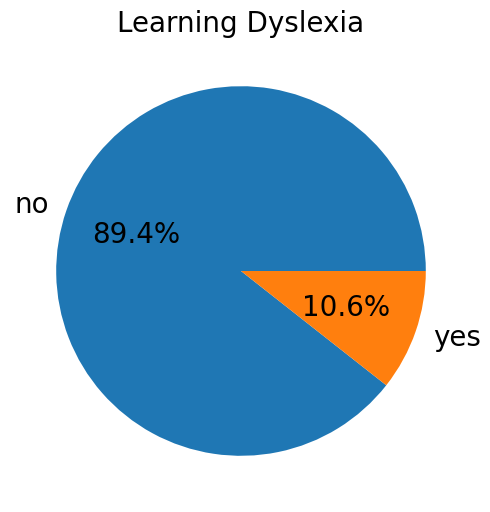

In [ ]:
import matplotlib.pyplot as plt
corr = tabletData.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
df_test = tabletData.copy()
df_test = tabletData.astype('string')

plt.figure(figsize = (8,6))
plt.pie(df_test['Dyslexia'].value_counts(), labels = ['no', 'yes'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Learning Dyslexia', fontsize=20)
plt.show()

In [ ]:
# Fill missing values with column means
cleaned_desktopData.fillna(cleaned_desktopData.mean(), inplace=True)

<ipython-input-118-af392e30994b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_desktopData.fillna(cleaned_desktopData.mean(), inplace=True)


In [ ]:
X = desktopData.drop('Dyslexia', axis=1)
y = desktopData['Dyslexia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Create a Random Forest Classifier and train it on the data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Test the model on the testing set
y_pred = rfc.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8902743142144638


In [ ]:
# Create an SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)

# Test the model on the testing set
y_pred_svm = svm.predict(X_test)

# Calculate accuracy for SVM
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8877805486284289


In [ ]:
# Create a Logistic Regression Classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Test the model on the testing set
y_pred_lr = logistic_reg.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.8985868661679135


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Test the model on the testing set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy for KNN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)


K-Nearest Neighbors Accuracy: 0.8794679966749792


In [ ]:
# List of algorithm names and their corresponding accuracies
algorithm_names = ['Random Forest', 'SVM', 'Logistic Regression', 'K-Nearest Neighbors']
accuracies = [accuracy, accuracy_svm, accuracy_lr, accuracy_knn]

# Create a DataFrame
algorithm_df = pd.DataFrame({'Algorithm': algorithm_names, 'Accuracy': accuracies})

# Display the table
print(algorithm_df)

             Algorithm  Accuracy
0        Random Forest  0.890274
1                  SVM  0.887781
2  Logistic Regression  0.898587
3  K-Nearest Neighbors  0.879468


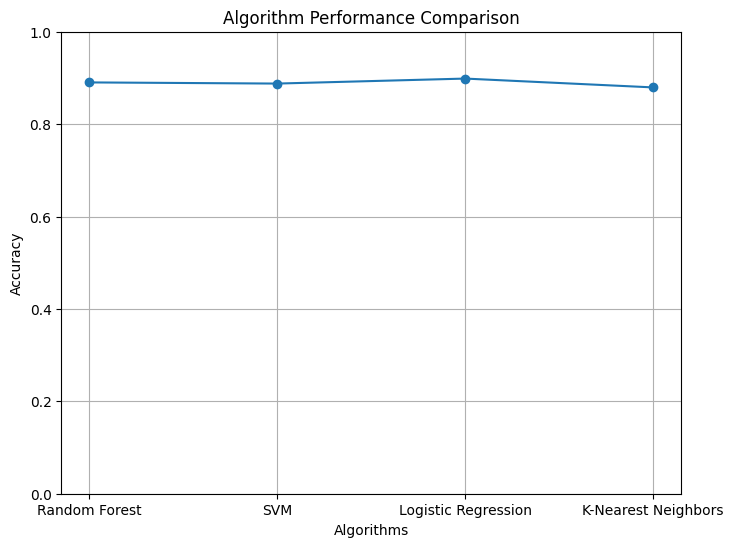

In [ ]:
# List of algorithm names and their corresponding accuracies
algorithm_names = ['Random Forest', 'SVM', 'Logistic Regression', 'K-Nearest Neighbors']
accuracies = [accuracy, accuracy_svm, accuracy_lr, accuracy_knn]

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(algorithm_names, accuracies, marker='o', linestyle='-')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Performance Comparison')
plt.grid(True)  # Add grid lines for better readability
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 (for accuracy)
plt.show()